In [1]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
bike_rentals=pd.read_csv('bike_rental_hour.csv')

In [3]:
bike_rentals.head(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

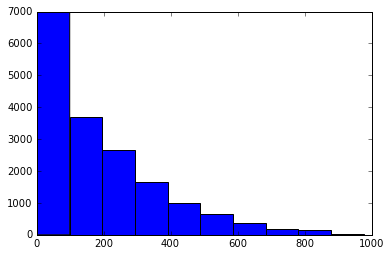

In [4]:
plt.hist(bike_rentals["cnt"])

In [5]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [6]:
def assign_label(hour: int) -> int:
    if hour >= 0 and hour < 6:
        return 4
    elif hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <= 24:
        return 3
    

In [7]:
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [8]:
bike_rentals

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
5            6  2011-01-01       1   0     1   5        0        6   
6            7  2011-01-01       1   0     1   6        0        6   
7            8  2011-01-01       1   0     1   7        0        6   
8            9  2011-01-01       1   0     1   8        0        6   
9           10  2011-01-01       1   0     1   9        0        6   
10          11  2011-01-01       1   0     1  10        0        6   
11          12  2011-01-01       1   0     1  11        0        6   
12          13  2011-01-01       1   0     1  12        0        6   
13          14  2011-01-01       1   0     1  13        0        6   
14          15  2011-01-01       1   0     1  14        0        6   
15          16  2011-01-01       1   0     1  15        0        6   
16          17  2011-01-01       1   0     1  16        0        6   
17          18  2011-01-01       1   0     1  17        0        6   
18          19  2011-01-01       1   0     1  18        0        6   
19          20  2011-01-01       1   0     1  19        0        6   
20          21  2011-01-01       1   0     1  20        0        6   
21          22  2011-01-01       1   0     1  21        0        6   
22          23  2011-01-01       1   0     1  22        0        6   
23          24  2011-01-01       1   0     1  23        0        6   
24          25  2011-01-02       1   0     1   0        0        0   
25          26  2011-01-02       1   0     1   1        0        0   
26          27  2011-01-02       1   0     1   2        0        0   
27          28  2011-01-02       1   0     1   3        0        0   
28          29  2011-01-02       1   0     1   4        0        0   
29          30  2011-01-02       1   0     1   6        0        0   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17349    17350  2012-12-30       1   1    12  18        0        0   
17350    17351  2012-12-30       1   1    12  19        0        0   
17351    17352  2012-12-30       1   1    12  20        0        0   
17352    17353  2012-12-30       1   1    12  21        0        0   
17353    17354  2012-12-30       1   1    12  22        0        0   
17354    17355  2012-12-30       1   1    12  23        0        0   
17355    17356  2012-12-31       1   1    12   0        0        1   
17356    17357  2012-12-31       1   1    12   1        0        1   
17357    17358  2012-12-31       1   1    12   2        0        1   
17358    17359  2012-12-31       1   1    12   3        0        1   
17359    17360  2012-12-31       1   1    12   4        0        1   
17360    17361  2012-12-31       1   1    12   5        0        1   
17361    17362  2012-12-31       1   1    12   6        0        1   
17362    17363  2012-12-31       1   1    12   7        0        1   
17363    17364  2012-12-31       1   1    12   8        0        1   
17364    17365  2012-12-31       1   1    12   9        0        1   
17365    17366  2012-12-31       1   1    12  10        0        1   
17366    17367  2012-12-31       1   1    12  11        0        1   
17367    17368  2012-12-31       1   1    12  12        0        1   
17368    17369  2012-12-31       1   1    12  13        0        1   
17369    17370  2012-12-31       1   1    12  14        0        1   
17370    17371  2012-12-31       1   1    12  15        0        1   
17371    17372  2012-12-31       1   1    12  16        0        1   
17372    17373  2012-12-31       1   1    12  17        0        1   
17373    17374  2012-12-31       1   1    12  18        0        1   
17374    17375  2

In [9]:
train = bike_rentals.sample(frac=.8)

In [10]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [11]:
predictors = list(train.columns)


In [12]:
predictors = list(train.columns)
cols_to_remove=['cnt','casual','registered','dteday']
predictors = [col for col in predictors if col not in cols_to_remove]


In [13]:
reg = LinearRegression()

In [14]:
reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
import numpy
predictions = reg.predict(test[predictors])

# the mean squared error (MSE) between the predicted values (predictions)
#and the actual values (test["cnt"])
#The MSE is a common metric used to quantify the overall accuracy of regression models
numpy.mean((predictions - test["cnt"]) ** 2)

17236.962980942106

# Error


The error is very high, which may be due to the fact that the data has a few extremely high rental counts but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [16]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [17]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2551.9957270667746

# Decision Tree Error

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [22]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

1890.8248818954116